In [1]:
import numpy as np
import matplotlib.pyplot as plt

from util import *

import mpl_style
plt.style.use(mpl_style.style1)

In [2]:
is_double = True
prefix = ''
prefix = f'{prefix}ccf_'

In [3]:
params = read_params(f'{prefix}parameter_info.txt')
params

{'kappa_tot': 0.4,
 'shear': 0.4,
 'mu_ave': 5,
 'smooth_fraction': 0,
 'kappa_star': 0.4,
 'kappa_star_actual': 0.408921683,
 'theta_star': 1,
 'random_seed': 127817537,
 'mass_function': 'salpeter',
 'm_solar': 1,
 'm_lower': 0.1,
 'm_upper': 10,
 'mean_mass': 0.309371445,
 'mean_mass2': 0.394418372,
 'mean_mass2_ln_mass': 0.397221431,
 'm_lower_actual': 0.1000157,
 'm_upper_actual': 9.51144074,
 'mean_mass_actual': 0.31627173,
 'mean_mass2_actual': 0.447522919,
 'mean_mass2_ln_mass_actual': 0.501690201,
 'num_stars': 10000,
 'corner_x1': 34.8553988,
 'corner_x2': 174.276994,
 'taylor_smooth': 209,
 'num_roots': 20208,
 'num_phi': 200,
 'num_branches': 1,
 'max_error_1/mu': 6693094289999999521287465463226388157846956936592279732224,
 't_init_roots': 0.391,
 't_ccs': 6.661,
 't_caustics': 0.036}

In [4]:
stars = read_stars(f'{prefix}stars.bin', is_double)
print(stars.shape)

(10000, 3)


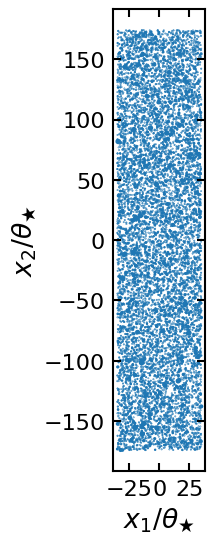

In [5]:
fig, ax = plt.subplots()
ax.scatter(stars[:, 0], stars[:, 1], s=stars[:,2])

ax.set_xlabel('$x_1 / \\theta_★$')
ax.set_ylabel('$x_2 / \\theta_★$')

ax.set_aspect(1)

plt.show()

In [6]:
dat = read_complex_array(f'{prefix}caustics.bin', is_double)

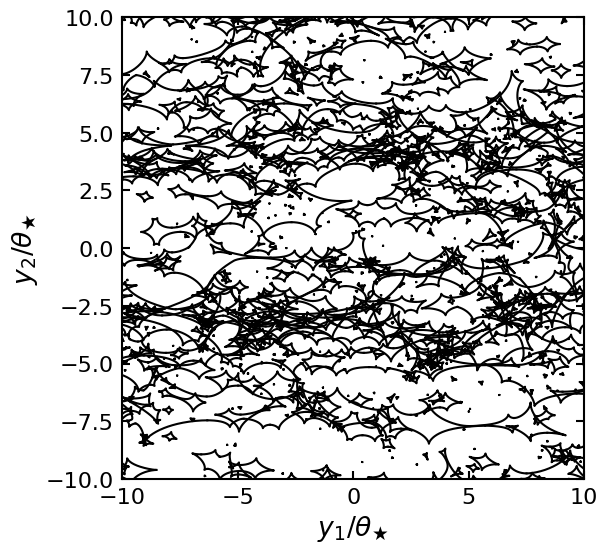

In [7]:
fix, ax = plt.subplots()

for what in dat:
    ax.plot(*(what.T), color='black')

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])

ax.set_xlabel('$y_1 / \\theta_★$')
ax.set_ylabel('$y_2 / \\theta_★$')

ax.set_aspect(1)

plt.show()

In [8]:
dat = read_complex_array(f'{prefix}ccs.bin', is_double)

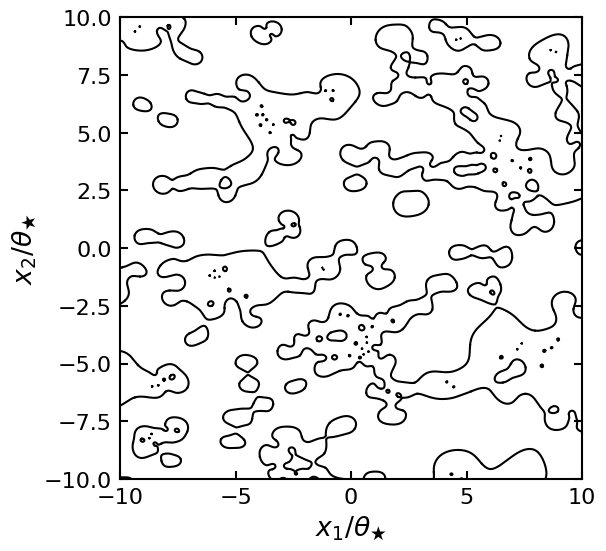

In [9]:
fix, ax = plt.subplots()

for what in dat:
    ax.plot(*(what.T), color='black')

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])

ax.set_xlabel('$x_1 / \\theta_★$')
ax.set_ylabel('$x_2 / \\theta_★$')

ax.set_aspect(1)

plt.show()